# Visualize Data Issues

This notebook provides a visualization of common data quality issues that may arise within an application, highlighting the importance of robust data validation and cleaning processes.

This notebook is designed to illustrate how data quality issues can manifest in an application. By visualizing these issues, we aim to gain a better understanding of their nature and impact.

## Libraries Import

This cell is responsible for importing the necessary libraries required for our example. Ensuring that all the required libraries are loaded is essential for the analyses that will follow.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

## January Data Analysis

In January, we encountered a timeliness issue with our data, which could also be interpreted as a completeness issue. Let's begin by loading the dataset to investigate this matter further.

- **Timeliness Issue**: This refers to the scenario where data is not available when expected or required.
- **Completeness Issue**: This pertains to instances where data is missing or incomplete.

In [2]:
# filepath = "/teamspace/studios/this_studio/Data-Observability-for-Data-Engineering/data/jan/orders.csv"
df_jan = pd.read_csv("~/Data-Observability-for-Data-Engineering/data/jan/orders.csv",parse_dates=['date'])
df_jan.head()

,date,order_id,email,page_visited,duration,total_basket,has_confirmed
0,2021-01-01,1aacfa9c-770d-4d90-9763-6551c8d89f55,baslie4t@bravesites.com,NaN,700.82,299.10,1
1,2021-01-01,5d0f80cf-2a32-4d1a-8bc8-e608822e95d4,mhextfz@nba.com,12.0,550.71,617.24,1
2,2021-01-01,8d2b7e99-dcd9-4883-bf42-061035735a24,pgeorgeonax@umich.edu,7.0,195.28,558.07,1
3,2021-01-01,2f518f9c-39e2-4d57-8e96-1409f3619e53,sstannas7d@mtv.com,13.0,353.41,48.65,1
4,2021-01-01,cd24bd4c-4d46-46c8-8259-c31ccfa3b3fa,wprestney1t@google.com.br,11.0,92.82,289.82,1


At first glance, the head of the dataset does not exhibit any peculiarities. Nevertheless, we have received reports of an issue concerning the number of pages visited. To delve deeper into this matter, we'll visualize the average number of pages visited on a daily basis.

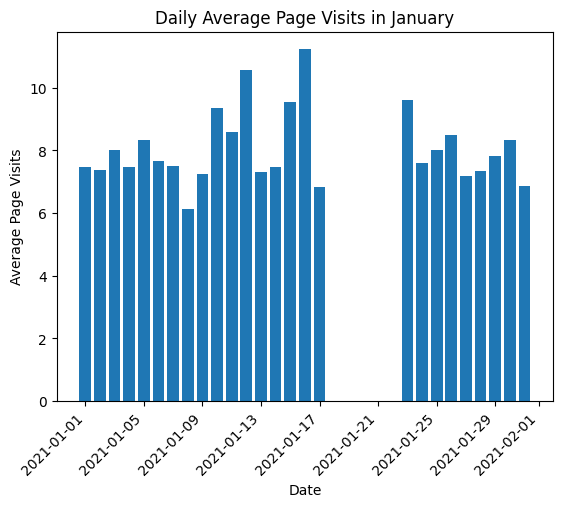

In [3]:
mean_duration = df_jan.groupby('date')['page_visited'].mean()

plt.bar(x=mean_duration.index, height=mean_duration.values)
plt.xticks(rotation=45, ha="right")

plt.xlabel('Date')  
plt.ylabel('Average Page Visits') 

plt.title('Daily Average Page Visits in January')
plt.show()

The visualization reveals a gap in the data, indicating missing averages for certain days. A closer examination of each date confirms this observation, with data absent from the 17th to the 23rd of January.

In [6]:
df_jan['date'].unique()

<DatetimeArray>
['2021-01-01 00:00:00', '2021-01-02 00:00:00', '2021-01-03 00:00:00',
 '2021-01-04 00:00:00', '2021-01-05 00:00:00', '2021-01-06 00:00:00',
 '2021-01-07 00:00:00', '2021-01-08 00:00:00', '2021-01-09 00:00:00',
 '2021-01-10 00:00:00', '2021-01-11 00:00:00', '2021-01-12 00:00:00',
 '2021-01-13 00:00:00', '2021-01-14 00:00:00', '2021-01-15 00:00:00',
 '2021-01-16 00:00:00', '2021-01-17 00:00:00', '2021-01-23 00:00:00',
 '2021-01-24 00:00:00', '2021-01-25 00:00:00', '2021-01-26 00:00:00',
 '2021-01-27 00:00:00', '2021-01-28 00:00:00', '2021-01-29 00:00:00',
 '2021-01-30 00:00:00', '2021-01-31 00:00:00']
Length: 26, dtype: datetime64[ns]

The subsequent step involves appending the dataset to the SQL `datalake.orders` table to ensure that our data lake is up-to-date with the latest information.

In [7]:
con=sqlite3.connect('datalake')
df_jan.to_sql('orders',con,if_exists='append')

359

## February Data Issues

In February, we encountered a significant issue: writing the dataset to the `datalake.orders` table was infeasible due to a breakdown in the application.

In [ ]:
df_feb = pd.read_csv("~/Data-Observability-for-Data-Engineering/data/feb/orders.csv",parse_dates=['date'])

An inspection of the error reveals a completeness issue, this time attributable to an incomplete schema. Specifically, the field `email_customer` was added. In fact, the field `email` was renamed to `email_customer` in this dataset, which likely caused the problem.

In [ ]:
df_feb.to_sql('orders',con,if_exists='append')

## March Data Anomalies

March brought forth another completeness issue. Due to complications with the cookies provider, there was a noticeable increase in the number of `NaN` values for the `page_visited` column, rising from approximately 5% to 25%.

In [ ]:
df_mar = pd.read_csv("~/Data-Observability-for-Data-Engineering/data/mar/orders.csv",parse_dates=['date'])

In [ ]:
import matplotlib.pyplot as plt

na_jan = sum(df_jan["page_visited"].isna())/df_jan.shape[1]
na_feb = sum(df_feb["page_visited"].isna())/df_feb.shape[1]
na_mar = sum(df_mar["page_visited"].isna())/df_mar.shape[1]

plt.bar(x=['jan', 'feb', 'mar'], height=[na_jan, na_feb, na_mar])


plt.xlabel('Month')  
plt.ylabel('Proportion of Missing Page Visits') 


plt.title('Proportion of Missing Page Visits per Month')

plt.show()

## Summary

Throughout this notebook, we have explored various data issues. Some caused immediate disruptions in the application, while others were more insidious. Recognizing and addressing these issues is crucial for maintaining data integrity and ensuring smooth application functionality.